<h1>MINI PROJECT: DATASET 1</h1>

# Part 1 

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/sdbwbf/E4_CR_wide.csv
/kaggle/input/sevwfvw/E3.csv
/kaggle/input/sevwfvw/E1.csv
/kaggle/input/sevwfvw/E2.csv
/kaggle/input/1udsni/SUBTLEX-US frequency list with PoS and Zipf information.xlsx
/kaggle/input/1udsni/E4_CR.csv
/kaggle/input/1udsni/Madan_pRecall_database.csv
/kaggle/input/1udsni/E5_CR.csv


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
e1 = pd.read_csv("/kaggle/input/sevwfvw/E1.csv")
e2 = pd.read_csv("/kaggle/input/sevwfvw/E2.csv")
e3 = pd.read_csv("/kaggle/input/sevwfvw/E3.csv")

In [4]:
data1 = pd.read_csv("/kaggle/input/1udsni/E4_CR.csv")
data2 = pd.read_csv("/kaggle/input/1udsni/E5_CR.csv")
data3 = pd.read_csv("/kaggle/input/1udsni/Madan_pRecall_database.csv")
data4 = pd.read_excel("/kaggle/input/1udsni/SUBTLEX-US frequency list with PoS and Zipf information.xlsx")

<h2>Missing values imputation</h2>

In [5]:
print(data1.isnull().sum())

Experiment     0
Participant    0
block          0
testTrial      0
isPure         0
isStrong       0
cue            0
target         0
response       0
respDt         0
respAbst       0
exactMatch     0
clearIDK       0
isCorrect      0
isIntrusion    0
isIDK          0
dtype: int64


In [6]:
print(data2.isnull().sum())

Experiment        0
Participant       0
fullDataSet       0
day               0
studyTestBlock    0
testTrial         0
listType          0
isPure            0
isStrong          0
cue               0
target            0
response          0
delta.t           0
abs.t             0
isCorrect         0
isIntrusion       0
isIDK             0
dtype: int64


In [7]:
print(data3.isnull().sum())

word               0
pRecall            0
Size               0
Animacy            0
nLet               0
nSyl               0
WFlog              0
CDlog              0
Prevalence        18
ONsize             0
AoA               25
Concreteness      21
NoF              277
BOI              177
Arousal            0
Valence            0
Dominance         83
Graspability    1385
Pantomime       1385
Action          1385
Danger          1385
Usefulness      1385
dtype: int64


In [8]:
print(data4.isnull().sum())

Word                      2
FREQcount                 0
CDcount                   0
FREQlow                   0
Cdlow                     0
SUBTLWF                   0
Lg10WF                    0
SUBTLCD                   0
Lg10CD                    0
Dom_PoS_SUBTLEX         191
Freq_dom_PoS_SUBTLEX    191
Percentage_dom_PoS      191
All_PoS_SUBTLEX         191
All_freqs_SUBTLEX       191
Zipf-value                0
dtype: int64


In [9]:
data3 = data3.dropna()
data4 = data4.dropna()

<h2>Replace outliers with statistical measures</h2>

In [10]:
def remove_outliers(df):
    df_cleaned = df.copy()
    
    # Select only numerical columns
    num_cols = df_cleaned.select_dtypes(include=[np.number]).columns

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical columns
    Q1 = df_cleaned[num_cols].quantile(0.25)
    Q3 = df_cleaned[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier range (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only the rows where all numerical values are within the outlier range
    df_cleaned = df_cleaned[~((df_cleaned[num_cols] < lower_bound) | (df_cleaned[num_cols] > upper_bound)).any(axis=1)]
    
    return df_cleaned

In [11]:
# data1 = remove_outliers(data1)
# data2 = remove_outliers(data2)

# What is the overall accuracy of memory performance?

In [12]:
df = data1

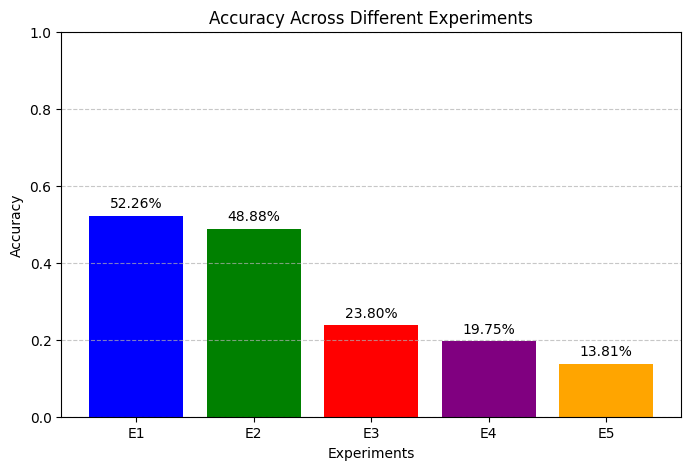

In [13]:
import matplotlib.pyplot as plt

# Compute accuracy for each experiment
accuracy_values = [
    e1["isCorrect"].mean(),
    e2["isCorrect"].mean(),
    e3["isCorrect"].mean(),
    data1["isCorrect"].mean(),
    data2["isCorrect"].mean()
]

# Experiment labels
experiment_labels = ["E1", "E2", "E3", "E4", "E5"]

# Create bar graph
plt.figure(figsize=(8, 5))
plt.bar(experiment_labels, accuracy_values, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add labels and title
plt.xlabel("Experiments")
plt.ylabel("Accuracy")
plt.title("Accuracy Across Different Experiments")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show percentages on top of bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha='center', fontsize=10)

# Show the plot
plt.show()


In [14]:
accuracy = df["isCorrect"].mean()
print(f"Overall Accuracy: {accuracy:.2%}")

Overall Accuracy: 19.75%


CLT Estimated Accuracy: 0.1975
CLT 95% CI: (0.1822, 0.2129)
Bootstrap Estimated Accuracy: 0.1977
Bootstrap 95% CI: (0.1825, 0.2133)


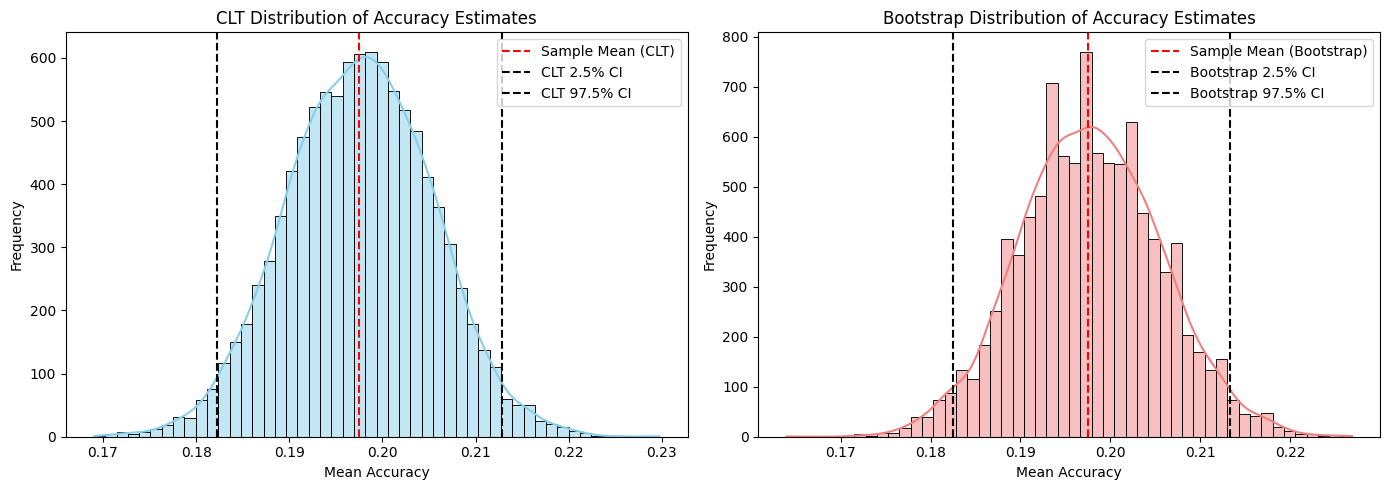

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = data1  # Assuming data1 is already defined

# 1. CLT-Based Confidence Interval
accuracy_mean = df["isCorrect"].mean()
n = len(df)

# Standard Error for a proportion
SE = np.sqrt((accuracy_mean * (1 - accuracy_mean)) / n)

# 95% Confidence Interval using Normal Approximation (CLT)
Z = stats.norm.ppf(0.975)  # Z-score for 95% CI
clt_lower = accuracy_mean - Z * SE
clt_upper = accuracy_mean + Z * SE

print(f"CLT Estimated Accuracy: {accuracy_mean:.4f}")
print(f"CLT 95% CI: ({clt_lower:.4f}, {clt_upper:.4f})")

# 2. Bootstrapping
bootstrap_means = []
n_iterations = 10000  # Number of bootstrap samples

for _ in range(n_iterations):
    sample = df["isCorrect"].sample(n, replace=True)  # Resampling with replacement
    bootstrap_means.append(sample.mean())

# 95% CI using percentiles (Bootstrapping)
boot_lower, boot_upper = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Bootstrap Estimated Accuracy: {np.mean(bootstrap_means):.4f}")
print(f"Bootstrap 95% CI: ({boot_lower:.4f}, {boot_upper:.4f})")

# --- Plotting --- #

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CLT Histogram
clt_samples = np.random.normal(loc=accuracy_mean, scale=SE, size=10000)
sns.histplot(clt_samples, bins=50, kde=True, ax=axes[0], color="skyblue")
axes[0].axvline(accuracy_mean, color="red", linestyle="dashed", label="Sample Mean (CLT)")
axes[0].axvline(clt_lower, color="black", linestyle="dashed", label="CLT 2.5% CI")
axes[0].axvline(clt_upper, color="black", linestyle="dashed", label="CLT 97.5% CI")
axes[0].set_title("CLT Distribution of Accuracy Estimates")
axes[0].set_xlabel("Mean Accuracy")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Bootstrap Histogram
sns.histplot(bootstrap_means, bins=50, kde=True, ax=axes[1], color="lightcoral")
axes[1].axvline(accuracy_mean, color="red", linestyle="dashed", label="Sample Mean (Bootstrap)")
axes[1].axvline(boot_lower, color="black", linestyle="dashed", label="Bootstrap 2.5% CI")
axes[1].axvline(boot_upper, color="black", linestyle="dashed", label="Bootstrap 97.5% CI")
axes[1].set_title("Bootstrap Distribution of Accuracy Estimates")
axes[1].set_xlabel("Mean Accuracy")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

# How does the type of cue-target pair affect the accuracy? 

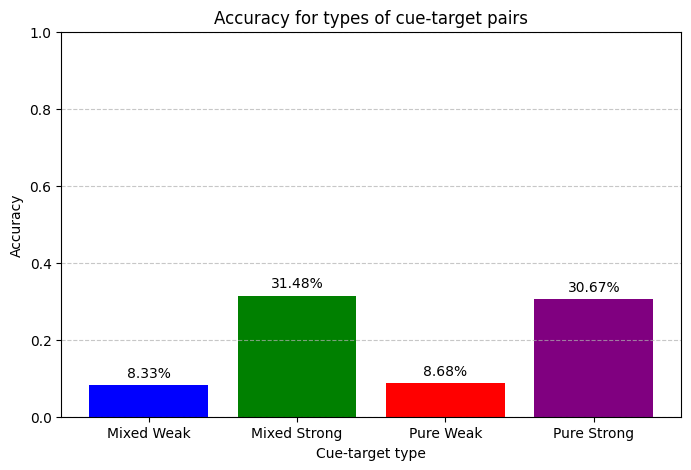

In [16]:
import matplotlib.pyplot as plt

# Define conditions based on isPure and isStrong values
conditions = {
    "Mixed Weak": (data1["isPure"] == 0) & (data1["isStrong"] == 0),
    "Mixed Strong": (data1["isPure"] == 0) & (data1["isStrong"] == 1),
    "Pure Weak": (data1["isPure"] == 1) & (data1["isStrong"] == 0),
    "Pure Strong": (data1["isPure"] == 1) & (data1["isStrong"] == 1),
}

# Calculate accuracy for each condition
accuracy_values = [data1.loc[cond, "isCorrect"].mean() for cond in conditions.values()]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(conditions.keys(), accuracy_values, color=['blue', 'green', 'red', 'purple'])

# Add labels and title
plt.xlabel("Cue-target type")
plt.ylabel("Accuracy")
plt.title("Accuracy for types of cue-target pairs")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show percentages on top of bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha='center', fontsize=10)

# Show the plot
plt.show()


# How fast were people to recall the target words? 

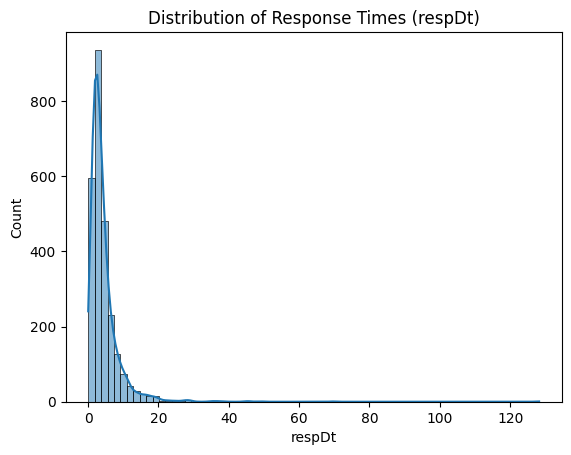

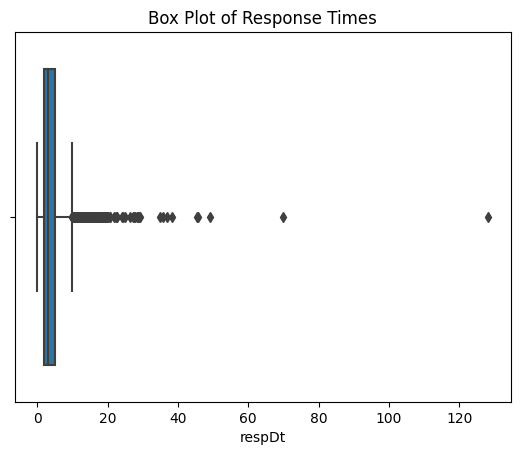

In [17]:
sns.histplot(data1['respDt'], bins=70, kde=True)
plt.title("Distribution of Response Times (respDt)")
plt.show()

sns.boxplot(x=data1['respDt'])
plt.title("Box Plot of Response Times")
plt.show()

CLT Estimated Population Mean: 4.3932
CLT 95% CI: (4.2025, 4.5838)
Bootstrap Estimated Population Mean: 4.3942
Bootstrap 95% CI: (4.2081, 4.5932)


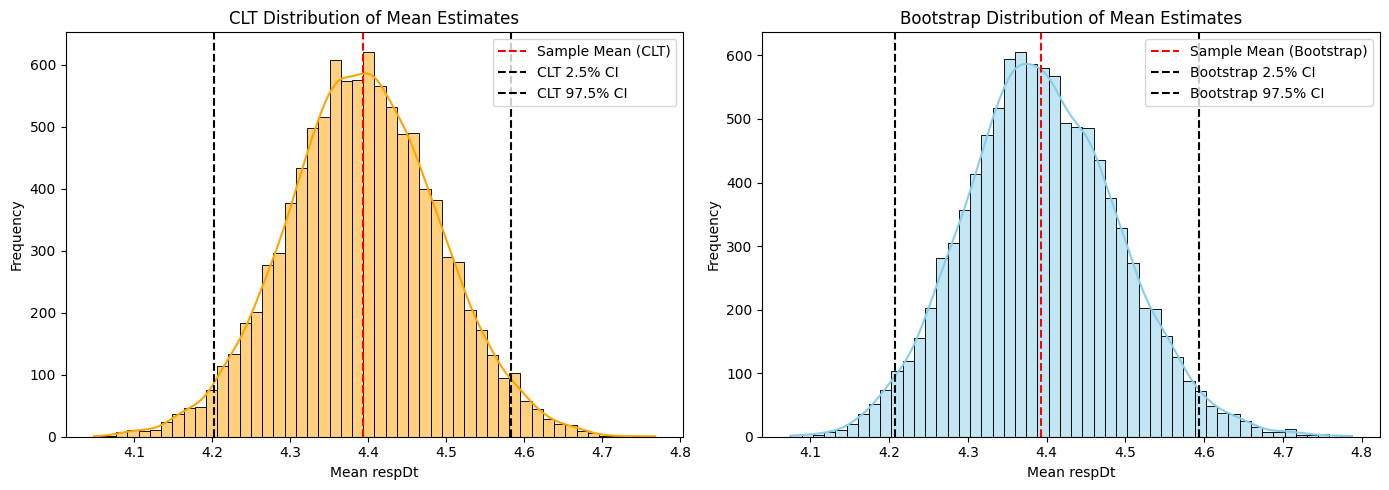

In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = data1  # Assuming data1 is already defined

# 1. CLT-Based Confidence Interval
sample_mean = df["respDt"].mean()
sample_std = df["respDt"].std()
n = len(df)

# Standard Error
SE = sample_std / np.sqrt(n)

# 95% Confidence Interval using Normal Approximation
Z = stats.norm.ppf(0.975)  # Z-score for 95% CI
clt_lower = sample_mean - Z * SE
clt_upper = sample_mean + Z * SE

print(f"CLT Estimated Population Mean: {sample_mean:.4f}")
print(f"CLT 95% CI: ({clt_lower:.4f}, {clt_upper:.4f})")

# 2. Bootstrapping
bootstrap_means = []
n_iterations = 10000  # Number of bootstrap samples

for _ in range(n_iterations):
    sample = df["respDt"].sample(n, replace=True)  # Resampling with replacement
    bootstrap_means.append(sample.mean())

# 95% CI using percentiles
boot_lower, boot_upper = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Bootstrap Estimated Population Mean: {np.mean(bootstrap_means):.4f}")
print(f"Bootstrap 95% CI: ({boot_lower:.4f}, {boot_upper:.4f})")

# --- Plotting --- #

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of CLT Estimates
sns.histplot(np.random.normal(sample_mean, SE, n_iterations), bins=50, kde=True, ax=axes[0], color="orange")
axes[0].axvline(sample_mean, color="red", linestyle="dashed", label="Sample Mean (CLT)")
axes[0].axvline(clt_lower, color="black", linestyle="dashed", label="CLT 2.5% CI")
axes[0].axvline(clt_upper, color="black", linestyle="dashed", label="CLT 97.5% CI")
axes[0].set_title("CLT Distribution of Mean Estimates")
axes[0].set_xlabel("Mean respDt")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Histogram of Bootstrap Means
sns.histplot(bootstrap_means, bins=50, kde=True, ax=axes[1], color="skyblue")
axes[1].axvline(sample_mean, color="red", linestyle="dashed", label="Sample Mean (Bootstrap)")
axes[1].axvline(boot_lower, color="black", linestyle="dashed", label="Bootstrap 2.5% CI")
axes[1].axvline(boot_upper, color="black", linestyle="dashed", label="Bootstrap 97.5% CI")
axes[1].set_title("Bootstrap Distribution of Mean Estimates")
axes[1].set_xlabel("Mean respDt")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()

# How do response times differ between correct and incorrect responses?

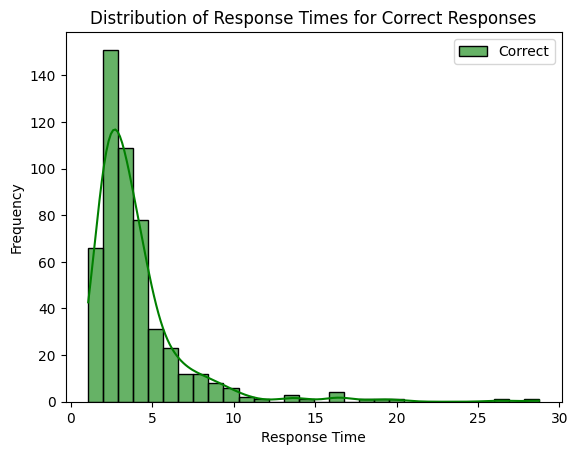

In [19]:
# Plot response time distributions
sns.histplot(df[df["isCorrect"] == 1]["respDt"], bins=30, kde=True, label="Correct", color="green", alpha=0.6)

plt.xlabel("Response Time")
plt.ylabel("Frequency")
plt.title("Distribution of Response Times for Correct Responses")
plt.legend()
plt.show()


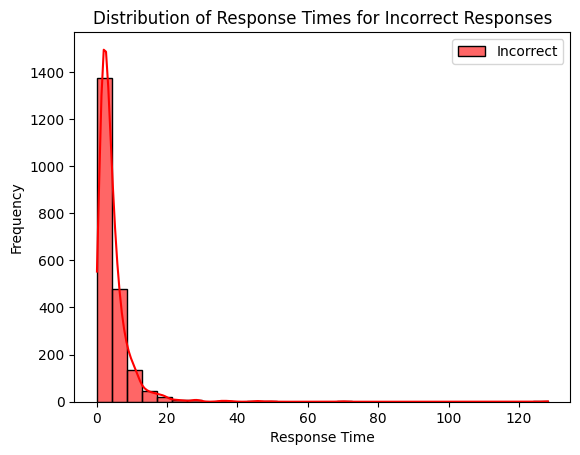

In [20]:
# Plot response time distributions
sns.histplot(df[df["isCorrect"] == 0]["respDt"], bins=30, kde=True, label="Incorrect", color="red", alpha=0.6)

plt.xlabel("Response Time")
plt.ylabel("Frequency")
plt.title("Distribution of Response Times for Incorrect Responses")
plt.legend()
plt.show()


In [21]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Extract response times for correct and incorrect responses
correct_times = df[df["isCorrect"] == 1]["respDt"]
incorrect_times = df[df["isCorrect"] == 0]["respDt"]

# Check normality using Shapiro-Wilk test
shapiro_correct = shapiro(correct_times)
shapiro_incorrect = shapiro(incorrect_times)

print(f"Shapiro-Wilk test for correct responses: W={shapiro_correct.statistic:.4f}, p={shapiro_correct.pvalue:.2f}")
print(f"Shapiro-Wilk test for incorrect responses: W={shapiro_incorrect.statistic:.4f}, p={shapiro_incorrect.pvalue:.2f}")

# Choose statistical test based on normality
if shapiro_correct.pvalue > 0.05 and shapiro_incorrect.pvalue > 0.05:
    print("Data appears normal, using t-test.")
    t_stat, p_value = ttest_ind(correct_times, incorrect_times, equal_var=False)
    print(f"T-test p-value: {p_value:.4f}")
else:
    print("Data is non-normal, using Mann-Whitney U test.")
    u_stat, p_value = mannwhitneyu(correct_times, incorrect_times, alternative="two-sided")
    print(f"Mann-Whitney U test p-value: {p_value:.4f}")


Shapiro-Wilk test for correct responses: W=0.6499, p=0.00
Shapiro-Wilk test for incorrect responses: W=0.5276, p=0.00
Data is non-normal, using Mann-Whitney U test.
Mann-Whitney U test p-value: 0.0463


In [22]:
import scipy.stats as stats

# Sample sizes
n1 = len(correct_times)
n2 = len(incorrect_times)

# Mann-Whitney U test (recompute to get U statistic)
u_stat, p_value = mannwhitneyu(correct_times, incorrect_times, alternative="two-sided")

# Compute effect size r (based on Z approximation)
z = stats.norm.ppf(1 - p_value / 2)  # Two-tailed Z
r = z / np.sqrt(n1 + n2)

print(f"Mann-Whitney U statistic: {u_stat}")
print(f"Effect size (r): {r:.4f}")


Mann-Whitney U statistic: 562702.0
Effect size (r): 0.0391


In [23]:
correct_times = df[df["isCorrect"] == 1]["respDt"]
incorrect_times = df[df["isCorrect"] == 0]["respDt"]

mean_correct = correct_times.mean()
median_correct = correct_times.median()

mean_incorrect = incorrect_times.mean()
median_incorrect = incorrect_times.median()

print(f"Mean Correct Response Time: {mean_correct}")
print(f"Median Correct Response Time: {median_correct}")
print(f"Mean Incorrect Response Time: {mean_incorrect}")
print(f"Median Incorrect Response Time: {median_incorrect}")


Mean Correct Response Time: 4.007260703125
Median Correct Response Time: 3.1440151
Mean Incorrect Response Time: 4.488143559663461
Median Incorrect Response Time: 3.1415141


In [24]:
accuracy = df["isCorrect"].mean()  # Assuming isCorrect is 1 for correct, 0 for incorrect
print(f"Overall Accuracy: {accuracy:.2%}")  # Converts to percentage format


Overall Accuracy: 19.75%


<h2>Are high-frequency target words easier to recall compared to low frequency target words?</h2>

In [25]:
df_target_freq = data1.merge(data4[["Word", "FREQcount"]], left_on="target", right_on="Word", how="left")

# Keep only the columns you need
df_target_freq = df_target_freq[["target", "FREQcount", "isCorrect", "isIntrusion", "isIDK", "respDt"]]  # Add other columns if needed

print(df_target_freq)

         target  FREQcount  isCorrect  isIntrusion  isIDK     respDt
0       sitting     4814.0          0            0      1  10.642411
1        became     2435.0          1            0      0   2.439124
2       affairs      747.0          0            0      1   1.545990
3          tiny     1643.0          0            0      1   3.767809
4         theme      710.0          0            0      1   1.413840
...         ...        ...        ...          ...    ...        ...
2587  supported      186.0          0            0      1   6.792461
2588      money    32679.0          1            0      0   9.038088
2589     impact      480.0          0            1      0   4.698516
2590      horse     4737.0          0            0      1   4.659498
2591     minute    19252.0          0            0      1  11.989409

[2592 rows x 6 columns]


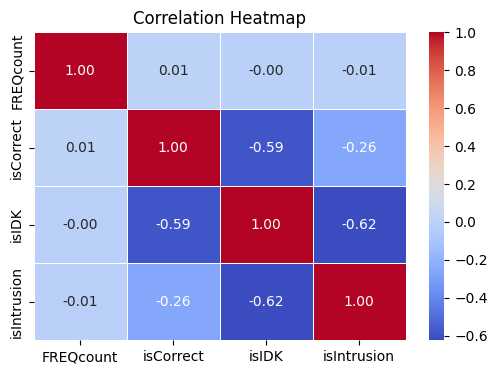

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_target_freq[["FREQcount", "isCorrect", "isIDK", "isIntrusion"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


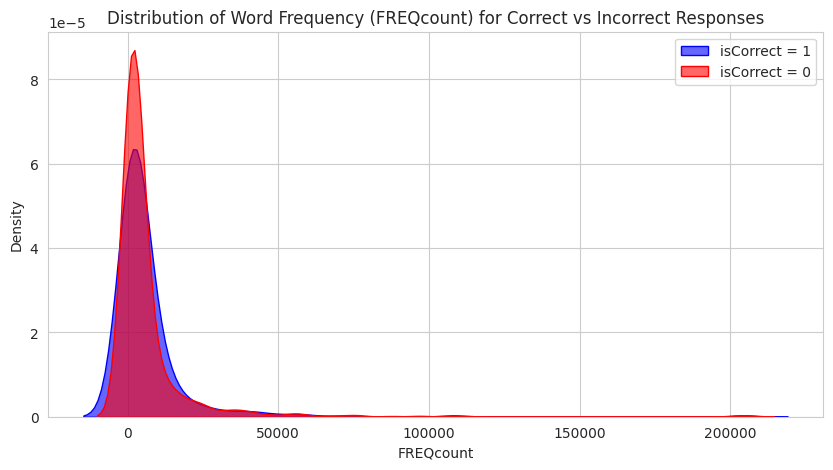

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot distribution of FREQcount for isCorrect = 1 and isCorrect = 0
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_target_freq[df_target_freq["isCorrect"] == 1]["FREQcount"], 
            label="isCorrect = 1", fill=True, alpha=0.6, color="blue")
sns.kdeplot(data=df_target_freq[df_target_freq["isCorrect"] == 0]["FREQcount"], 
            label="isCorrect = 0", fill=True, alpha=0.6, color="red")

# Labels and title
plt.xlabel("FREQcount")
plt.ylabel("Density")
plt.title("Distribution of Word Frequency (FREQcount) for Correct vs Incorrect Responses")
plt.legend()
plt.show()


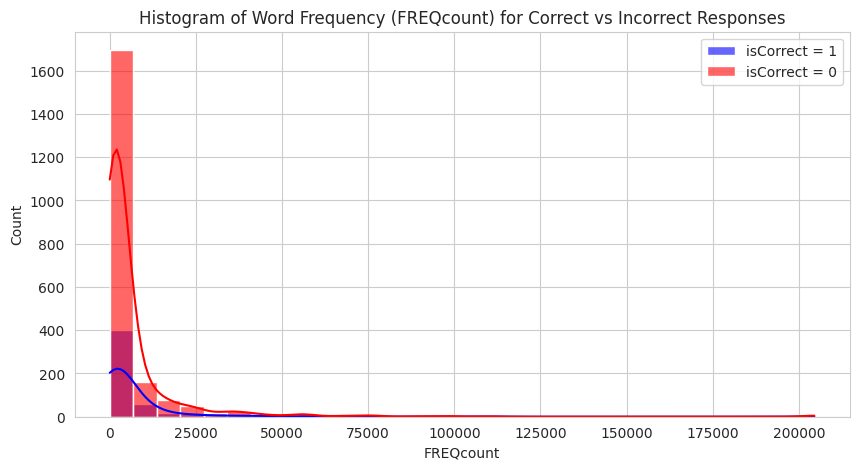

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df_target_freq[df_target_freq["isCorrect"] == 1]["FREQcount"], 
             label="isCorrect = 1", bins=30, kde=True, color="blue", alpha=0.6)
sns.histplot(df_target_freq[df_target_freq["isCorrect"] == 0]["FREQcount"], 
             label="isCorrect = 0", bins=30, kde=True, color="red", alpha=0.6)

plt.xlabel("FREQcount")
plt.ylabel("Count")
plt.title("Histogram of Word Frequency (FREQcount) for Correct vs Incorrect Responses")
plt.legend()
plt.show()


In [29]:
print(df_target_freq.isnull().sum())

target         0
FREQcount      2
isCorrect      0
isIntrusion    0
isIDK          0
respDt         0
dtype: int64


In [30]:
df_target_freq = df_target_freq.dropna()

In [31]:
from scipy.stats import ttest_ind

# Separate FREQcount values for correctly and incorrectly recalled words
freq_correct = df_target_freq[df_target_freq["isCorrect"] == 1]["FREQcount"]

freq_incorrect = df_target_freq[df_target_freq["isCorrect"] == 0]["FREQcount"]

# Perform t-test
t_stat, p_value = ttest_ind(freq_correct, freq_incorrect, equal_var=False)  # Welch's t-test (does not assume equal variance)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 0.4848422683069909, P-value: 0.6279326677759554


In [32]:
from scipy.stats import shapiro
print(shapiro(freq_correct))
print(shapiro(freq_incorrect))


ShapiroResult(statistic=0.34448119135834554, pvalue=4.082484692511745e-39)
ShapiroResult(statistic=0.36220732676157985, pvalue=6.267260160243253e-65)


In [33]:
from scipy.stats import mannwhitneyu, norm
import numpy as np

# Perform one-tailed Mann-Whitney U test
u_stat, p_value = mannwhitneyu(freq_correct, freq_incorrect, alternative='greater')
print(f"U-statistic: {u_stat:.4f}, P-value: {p_value:.4f}")

# Compute effect size (r)
n1 = len(freq_correct)
n2 = len(freq_incorrect)
mean_U = n1 * n2 / 2
std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

z = (u_stat - mean_U) / std_U
r = z / np.sqrt(n1 + n2)

print(f"Effect size (r): {r:.4f}")


U-statistic: 553886.5000, P-value: 0.0669
Effect size (r): 0.0295


In [34]:
from scipy.stats import pearsonr, spearmanr

# Compute Pearson correlation (assumes linear relationship)
pearson_corr, pearson_p = pearsonr(df_target_freq["FREQcount"], df_target_freq["respDt"])
print(f"Pearson Correlation: {pearson_corr}, P-value: {pearson_p}")

# Compute Spearman correlation (for non-linear relationships)
spearman_corr, spearman_p = spearmanr(df_target_freq["FREQcount"], df_target_freq["respDt"])
print(f"Spearman Correlation: {spearman_corr}, P-value: {spearman_p}")


Pearson Correlation: -0.016087730740304985, P-value: 0.4131315583713053
Spearman Correlation: -0.03832352892667231, P-value: 0.05115972897262278


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, mannwhitneyu

# Compute the median frequency
median_freq = df_target_freq["FREQcount"].median()  

# Split response times into high and low frequency groups
high_freq_rt = df_target_freq[df_target_freq["FREQcount"] >= median_freq]["respDt"]
low_freq_rt = df_target_freq[df_target_freq["FREQcount"] < median_freq]["respDt"]

# Normality check using Shapiro-Wilk test
shapiro_high = shapiro(high_freq_rt)
shapiro_low = shapiro(low_freq_rt)

print(f"Shapiro-Wilk Test (High Frequency): W={shapiro_high.statistic:.4f}, p={shapiro_high.pvalue:.4f}")
print(f"Shapiro-Wilk Test (Low Frequency): W={shapiro_low.statistic:.4f}, p={shapiro_low.pvalue:.4f}")

# If p < 0.05, data is NOT normal
if shapiro_high.pvalue < 0.05 or shapiro_low.pvalue < 0.05:
    print("Data is not normally distributed. Performing Mann-Whitney U test.")
    stat, p_value = mannwhitneyu(high_freq_rt, low_freq_rt, alternative="two-sided")
else:
    print("Data is normally distributed. Performing t-test.")
    stat, p_value = ttest_ind(high_freq_rt, low_freq_rt, equal_var=False)

print(f"Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")


Shapiro-Wilk Test (High Frequency): W=0.4540, p=0.0000
Shapiro-Wilk Test (Low Frequency): W=0.6144, p=0.0000
Data is not normally distributed. Performing Mann-Whitney U test.
Test Statistic: 803116.0000, P-value: 0.0629


In [36]:
from scipy.stats import norm

# Sizes of the two groups
n1 = len(high_freq_rt)
n2 = len(low_freq_rt)
N = n1 + n2

# Mann-Whitney U test
u_stat, p_value = mannwhitneyu(high_freq_rt, low_freq_rt, alternative="two-sided")

# Calculate mean and standard deviation of U
mean_U = n1 * n2 / 2
std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# Compute z-score
z = (u_stat - mean_U) / std_U

# Compute effect size r
r = abs(z) / np.sqrt(N)

print(f"Mann-Whitney U statistic: {u_stat:.4f}")
print(f"Effect size (r): {r:.4f}")


Mann-Whitney U statistic: 803116.0000
Effect size (r): 0.0366


# What psycholinguistic features of words are related to the ease of retrieving those words?

In [37]:
data3["word"] = data3["word"].str.lower()

In [38]:
df_psycho = data1.merge(data3, left_on="target", right_on="word", how="left")

df_psycho.drop(columns=["Experiment", "Participant", "block", "testTrial", "isPure", "isStrong", "cue", "respAbst", "exactMatch", "clearIDK"], inplace=True)


In [39]:
df_psycho = df_psycho.dropna()

In [40]:
# Identify numerical columns excluding binary ones
binary_columns = ["isCorrect", "isIDK", "isIntrusion"]
numeric_columns = df_psycho.select_dtypes(include=["number"]).columns
filtered_columns = [col for col in numeric_columns if col not in binary_columns]

# Compute correlation only for selected numerical columns
correlation_matrix = df_psycho[filtered_columns].corr()

# Print correlation with respDt
print(correlation_matrix["respDt"].sort_values())


Arousal        -0.354765
AoA            -0.352638
Animacy        -0.255172
Danger         -0.252182
pRecall        -0.206199
Usefulness     -0.131290
WFlog          -0.124905
NoF            -0.086511
CDlog          -0.075236
Action         -0.065261
ONsize         -0.039901
Concreteness    0.002567
Pantomime       0.030133
BOI             0.065248
nSyl            0.101305
Prevalence      0.106593
Valence         0.118237
nLet            0.141416
Dominance       0.142950
Graspability    0.374804
Size            0.417311
respDt          1.000000
Name: respDt, dtype: float64


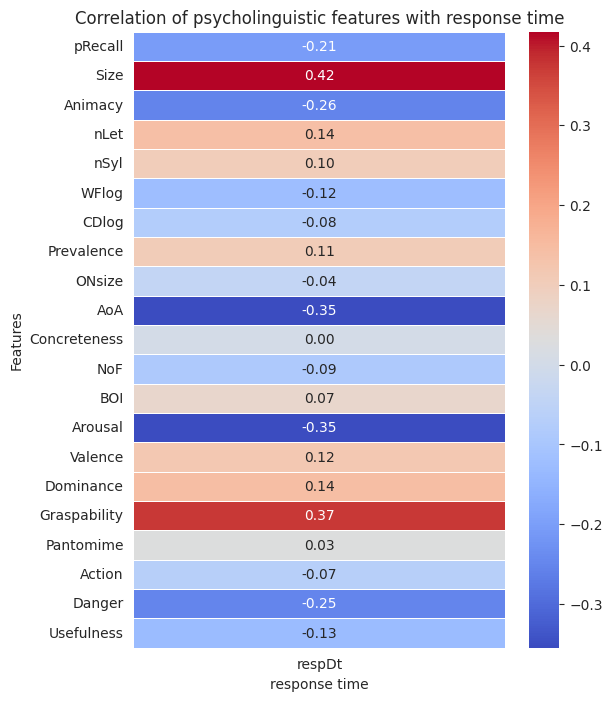

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with respDt and reshape for heatmap
correlations = correlation_matrix[["respDt"]].drop("respDt")  # Drop self-correlation

# Plot heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Set labels
plt.title("Correlation of psycholinguistic features with response time")
plt.ylabel("Features")
plt.xlabel("response time")

# Show plot
plt.show()


In [42]:
# Identify numerical columns excluding respDt
binary_columns = ["isCorrect", "isIDK", "isIntrusion"]
numeric_columns = df_psycho.select_dtypes(include=["number"]).columns
filtered_columns = [col for col in numeric_columns if col != "respDt"]  # Exclude respDt

# Compute correlation matrix
correlation_matrix = df_psycho[filtered_columns].corr()

# Extract correlations of isCorrect, isIDK, isIntrusion with numerical features
correlations = correlation_matrix.loc[binary_columns].drop(columns=binary_columns)

# Print correlations
print(correlations)


              pRecall      Size   Animacy      nLet      nSyl     WFlog  \
isCorrect    0.088713 -0.160872 -0.104992  0.181783  0.198999 -0.052102   
isIDK       -0.028777  0.211810  0.227626 -0.027859  0.035007  0.119593   
isIntrusion -0.070515 -0.095605 -0.187542 -0.188045 -0.297560 -0.102355   

                CDlog  Prevalence    ONsize       AoA  ...       NoF  \
isCorrect   -0.041603   -0.024848 -0.081715  0.092972  ... -0.120811   
isIDK        0.089327   -0.029524 -0.242486 -0.180142  ...  0.144525   
isIntrusion -0.073095    0.072370  0.441542  0.136077  ... -0.051441   

                  BOI   Arousal   Valence  Dominance  Graspability  Pantomime  \
isCorrect   -0.062575  0.024954  0.023221  -0.033958     -0.108295  -0.035711   
isIDK        0.167486  0.124750  0.040501   0.006299      0.244920   0.245717   
isIntrusion -0.156324 -0.205817 -0.085704   0.033595     -0.207628  -0.299400   

               Action    Danger  Usefulness  
isCorrect   -0.079062  0.079407   -0.02

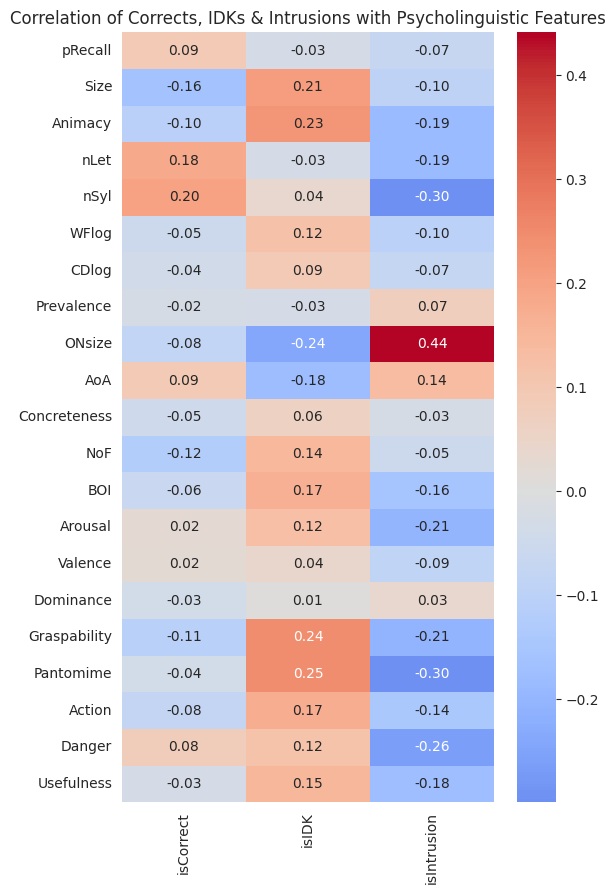

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns excluding respDt
binary_columns = ["isCorrect", "isIDK", "isIntrusion"]
numeric_columns = df_psycho.select_dtypes(include=["number"]).columns
filtered_columns = [col for col in numeric_columns if col != "respDt"]  # Exclude respDt

# Compute correlation matrix
correlation_matrix = df_psycho[filtered_columns].corr()

# Extract correlations of isCorrect, isIDK, isIntrusion
correlations = correlation_matrix.loc[binary_columns].drop(columns=binary_columns)

# Transpose the correlation matrix for vertical orientation
correlations = correlations.T  

# Plot heatmap
plt.figure(figsize=(6, 10))  # Adjust figure size for vertical format
sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0, fmt=".2f")

# Rotate x-axis labels (now at the top) for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title("Correlation of Corrects, IDKs & Intrusions with Psycholinguistic Features")
plt.show()


# Part 2

# Is there a significant difference in the correct recalls across the four conditions of the cue-target pairs i.e. mixed weak, mixed strong, pure weak and pure strong?

In [44]:
agg_data = pd.read_csv("/kaggle/input/sdbwbf/E4_CR_wide.csv")

# Load your dataset
df = agg_data

In [45]:
from scipy.stats import shapiro
import pandas as pd

# Assuming your data is in a DataFrame df
# and the columns are: corrects.MW, corrects.MS, corrects.PW, corrects.PS

for cond in ['corrects.MW', 'corrects.MS', 'corrects.PW', 'corrects.PS']:
    stat, p = shapiro(df[cond])
    print(f"{cond}: W={stat:.4f}, p={p:.9f}")


corrects.MW: W=0.6891, p=0.000000002
corrects.MS: W=0.9324, p=0.004539906
corrects.PW: W=0.7510, p=0.000000033
corrects.PS: W=0.9258, p=0.002498413


In [46]:
import numpy as np

conditions = ['corrects.MW', 'corrects.MS', 'corrects.PW', 'corrects.PS']
diff_vars = []

# Compute variances of all pairwise differences
for i in range(len(conditions)):
    for j in range(i+1, len(conditions)):
        diff = df[conditions[i]] - df[conditions[j]]
        var = np.var(diff, ddof=1)
        diff_vars.append(var)
        print(f"Variance of difference between {conditions[i]} and {conditions[j]}: {var:.4f}")


Variance of difference between corrects.MW and corrects.MS: 0.0521
Variance of difference between corrects.MW and corrects.PW: 0.0198
Variance of difference between corrects.MW and corrects.PS: 0.0511
Variance of difference between corrects.MS and corrects.PW: 0.0565
Variance of difference between corrects.MS and corrects.PS: 0.0576
Variance of difference between corrects.PW and corrects.PS: 0.0443


In [47]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(
    df['corrects.MW'],
    df['corrects.MS'],
    df['corrects.PW'],
    df['corrects.PS']
)

print(f"Friedman test statistic: {stat:.4f}, p-value: {p:.20f}")


Friedman test statistic: 76.3767, p-value: 0.00000000000000018366


This provides strong evidence that at least one of the four conditions (MW, MS, PW, PS) differs significantly in terms of correct recall performance.

In [48]:
import pandas as pd
from scipy.stats import wilcoxon
import itertools

# Pairwise comparisons
conds = ['corrects.MW', 'corrects.MS', 'corrects.PW', 'corrects.PS']
pairs = list(itertools.combinations(conds, 2))

# Run Wilcoxon tests and collect p-values
results = []
for c1, c2 in pairs:
    stat, p = wilcoxon(df[c1], df[c2])
    results.append({'pair': f"{c1} vs {c2}", 'p_value': p})

# Convert to DataFrame for sorting
results_df = pd.DataFrame(results)
results_df.sort_values('p_value', inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Holm–Bonferroni correction
alpha = 0.05
m = len(results_df)
results_df['alpha_i'] = [alpha / (m - i) for i in range(m)]
results_df['corrected_p_value'] = results_df['p_value'] * (m - results_df.index)
results_df['significant'] = results_df['p_value'] <= results_df['alpha_i']

# Determine where to stop rejecting
stop_index = results_df['significant'].idxmin() if not results_df['significant'].all() else m

# Only first k hypotheses are significant
results_df.loc[stop_index:, 'significant'] = False

# Print results
print(results_df[['pair', 'alpha_i', 'significant']])
print(results_df[['p_value', 'corrected_p_value']])


                         pair   alpha_i  significant
0  corrects.PW vs corrects.PS  0.008333         True
1  corrects.MW vs corrects.PS  0.010000         True
2  corrects.MW vs corrects.MS  0.012500         True
3  corrects.MS vs corrects.PW  0.016667         True
4  corrects.MS vs corrects.PS  0.025000        False
5  corrects.MW vs corrects.PW  0.050000        False
        p_value  corrected_p_value
0  4.158365e-08       2.495019e-07
1  4.583324e-08       2.291662e-07
2  1.228915e-07       4.915660e-07
3  2.982892e-07       8.948677e-07
4  7.659051e-01       1.531810e+00
5  7.688446e-01       7.688446e-01


In [49]:
import pandas as pd
import itertools
from scipy.stats import wilcoxon, norm
import numpy as np

conds = ['corrects.MW', 'corrects.MS', 'corrects.PW', 'corrects.PS']
pairs = list(itertools.combinations(conds, 2))

results = []

for c1, c2 in pairs:
    data1 = df[c1]
    data2 = df[c2]
    
    stat, p = wilcoxon(data1, data2, correction=False)
    
    # Estimate z-score using normal approximation
    n = len(data1)
    T = stat
    mean_T = n * (n + 1) / 4
    std_T = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (T - mean_T) / std_T
    
    r = abs(z) / np.sqrt(n)  # absolute value, direction isn't informative here
    
    results.append({
        'pair': f"{c1} vs {c2}",
        'p_value': p,
        'effect_size_r': r
    })

results_df = pd.DataFrame(results).sort_values('p_value')
print(results_df)


                         pair       p_value  effect_size_r
5  corrects.PW vs corrects.PS  4.158365e-08       0.831909
2  corrects.MW vs corrects.PS  4.583324e-08       0.837767
0  corrects.MW vs corrects.MS  1.228915e-07       0.833080
3  corrects.MS vs corrects.PW  2.982892e-07       0.820192
4  corrects.MS vs corrects.PS  7.659051e-01       0.241957
1  corrects.MW vs corrects.PW  7.688446e-01       0.630962


In [50]:
df.head()

,Experiment,Participant,corrects.MW,corrects.MS,corrects.PW,corrects.PS,intrusions.MW,intrusions.MS,intrusions.PW,intrusions.PS,respFails.MW,respFails.MS,respFails.PW,respFails.PS
0,4,1,0.00,0.50,0.250,0.9375,0.125,0.125,0.0625,0.0000,0.875,0.375,0.6875,0.0625
1,4,2,0.25,0.50,0.125,0.3125,0.125,0.000,0.2500,0.2500,0.625,0.500,0.6250,0.4375
2,4,3,0.00,0.25,0.375,0.3750,0.250,0.625,0.3750,0.3125,0.750,0.125,0.2500,0.3125
3,4,4,0.00,0.25,0.000,0.3125,0.250,0.500,0.2500,0.3125,0.750,0.250,0.7500,0.3750
4,4,6,0.00,0.25,0.125,0.0625,0.375,0.375,0.1250,0.3125,0.625,0.375,0.7500,0.6250


# Accuracy Drops in Later Trials of a Session

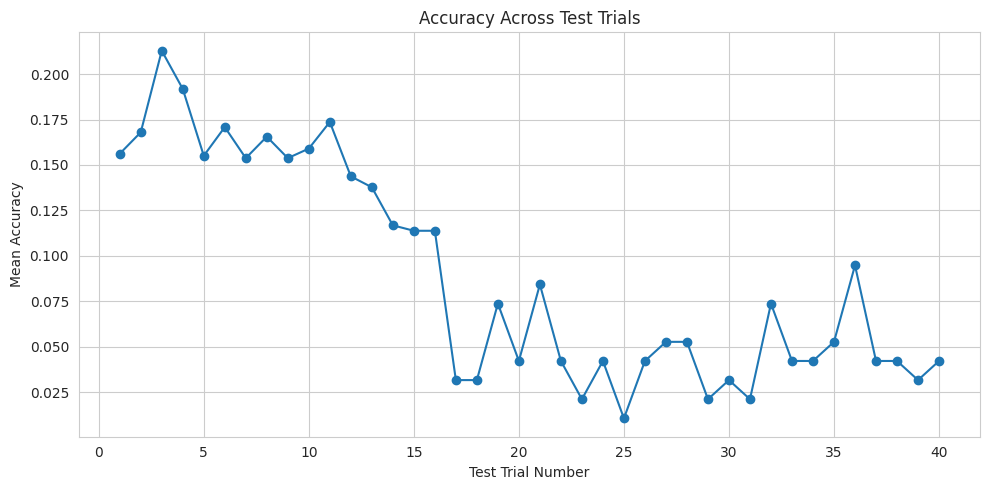

Spearman Correlation between testTrial and isCorrect: -0.11627427
P-value: 0.00000000
Result supports the hypothesis: Accuracy tends to drop in later trials.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load your dataset
dataa = pd.read_csv("/kaggle/input/1udsni/E5_CR.csv")  # replace with your actual path
df = dataa
# Group by testTrial and compute mean accuracy
trial_accuracy = df.groupby('testTrial')['isCorrect'].mean().reset_index()

# Plot accuracy vs. test trial number
plt.figure(figsize=(10, 5))
plt.plot(trial_accuracy['testTrial'], trial_accuracy['isCorrect'], marker='o', linestyle='-')
plt.title("Accuracy Across Test Trials")
plt.xlabel("Test Trial Number")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform Spearman correlation (non-parametric, robust to non-linearity)
correlation, p_value = spearmanr(df['testTrial'], df['isCorrect'])

print(f"Spearman Correlation between testTrial and isCorrect: {correlation:.8f}")
print(f"P-value: {p_value:.8f}")

if p_value < 0.05 and correlation < 0:
    print("Result supports the hypothesis: Accuracy tends to drop in later trials.")
elif p_value < 0.05:
    print("Statistically significant but correlation is not negative.")
else:
    print("No significant trend found.")


In [52]:
from scipy.stats import ttest_ind, mannwhitneyu

# Define early and late trials
early = df[df['testTrial'] <= df['testTrial'].median()]
late = df[df['testTrial'] > df['testTrial'].median()]

# Mann-Whitney U test (non-parametric alternative)
u_stat, p_val_u = mannwhitneyu(early['isCorrect'], late['isCorrect'])
print(f"Mann-Whitney U test: U = {u_stat}, p = {p_val_u:.4f}")


Mann-Whitney U test: U = 25552214.0, p = 0.0000


# Strong Cues Are More Likely to Lead to Intrusions in Mixed Lists

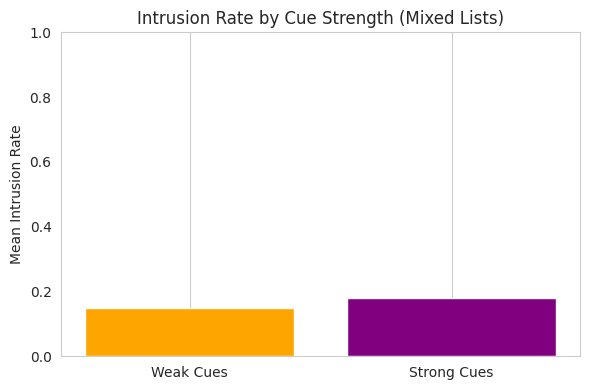

Contingency Table:
isIntrusion     0    1
isStrong              
0            1852  324
1            1887  417

Chi-square statistic: 8.1185
P-value: 0.0044
Strong cues are significantly more likely to lead to intrusions in mixed lists.


In [53]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

df = dataa
# Step 1: Filter for mixed lists only
mixed_df = df[df['isPure'] == 0]

# Step 2: Group by isStrong and compute mean intrusion rate
intrusion_by_strength = mixed_df.groupby('isStrong')['isIntrusion'].mean().reset_index()

# Step 3: Plot the result
plt.figure(figsize=(6,4))
plt.bar(['Weak Cues', 'Strong Cues'], intrusion_by_strength['isIntrusion'], color=['orange', 'purple'])
plt.ylabel("Mean Intrusion Rate")
plt.title("Intrusion Rate by Cue Strength (Mixed Lists)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 4: Create a contingency table
contingency = pd.crosstab(mixed_df['isStrong'], mixed_df['isIntrusion'])

# Step 5: Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Contingency Table:")
print(contingency)
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Strong cues are significantly more likely to lead to intrusions in mixed lists.")
else:
    print("No significant difference in intrusion rate between strong and weak cues in mixed lists.")


# Cue-Target Semantic Similarity Predicts Correctness

In [54]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 34.2 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


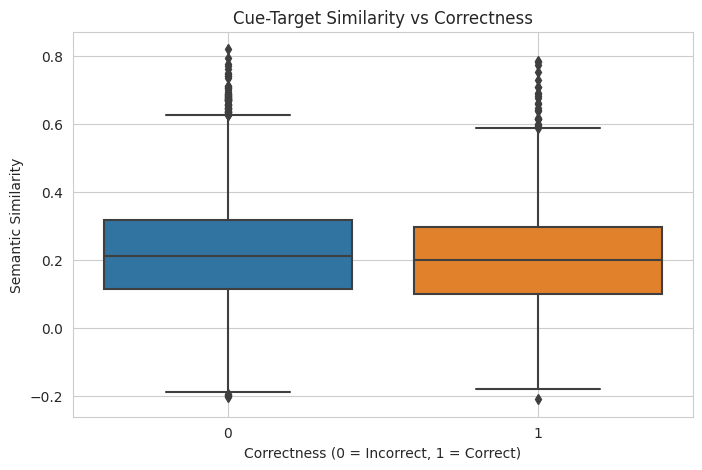

U-statistic: 10864464.000, P-value: 0.0001
Semantic similarity significantly predicts correctness.


In [58]:
import pandas as pd
import spacy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy model
nlp = spacy.load("en_core_web_md")  # You may need to run: python -m spacy download en_core_web_md

# Load dataset
df = dataa

# Compute semantic similarity
def get_similarity(row):
    try:
        doc1 = nlp(str(row["target"]))
        doc2 = nlp(str(row["cue"]))
        return doc1.similarity(doc2)
    except:
        return None

df["similarity"] = df.apply(get_similarity, axis=1)

# Drop rows with missing similarity
df = df.dropna(subset=["similarity", "isCorrect"])

# Plot similarity by correctness
plt.figure(figsize=(8, 5))
sns.boxplot(x="isCorrect", y="similarity", data=df)
plt.title("Cue-Target Similarity vs Correctness")
plt.xlabel("Correctness (0 = Incorrect, 1 = Correct)")
plt.ylabel("Semantic Similarity")
plt.grid(True)
plt.show()

# Statistical test
correct = df[df["isCorrect"] == 1]["similarity"]
incorrect = df[df["isCorrect"] == 0]["similarity"]
U_value, p_val = mannwhitneyu(correct, incorrect)

print(f"U-statistic: {U_value:.3f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Semantic similarity significantly predicts correctness.")
else:
    print("No significant relationship found.")


In [59]:
from scipy.stats import shapiro, levene, mannwhitneyu

# Statistical test
correct = df[df["isCorrect"] == 1]["similarity"]
incorrect = df[df["isCorrect"] == 0]["similarity"]

# Shapiro-Wilk test for normality
shapiro_correct = shapiro(correct)
shapiro_incorrect = shapiro(incorrect)
print(f"Shapiro-Wilk for correct: W={shapiro_correct.statistic:.4f}, p={shapiro_correct.pvalue:.4f}")
print(f"Shapiro-Wilk for incorrect: W={shapiro_incorrect.statistic:.4f}, p={shapiro_incorrect.pvalue:.4f}")

# Levene’s test for equal variances
levene_stat, levene_p = levene(correct, incorrect)
print(f"Levene’s Test: W={levene_stat:.4f}, p={levene_p:.4f}")

# Decide whether to use t-test or Mann-Whitney
if shapiro_correct.pvalue < 0.05 or shapiro_incorrect.pvalue < 0.05:
    print("Normality violated: using Mann-Whitney U test")
else:
    print("Normality assumed: using t-test")


Shapiro-Wilk for correct: W=0.9870, p=0.0000
Shapiro-Wilk for incorrect: W=0.9949, p=0.0000
Levene’s Test: W=1.2226, p=0.2689
Normality violated: using Mann-Whitney U test


In [60]:
import statsmodels.api as sm

X = df["similarity"]
X = sm.add_constant(X)  # adds intercept
y = df["isCorrect"]

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.400992
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              isCorrect   No. Observations:                13900
Model:                          Logit   Df Residuals:                    13898
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Apr 2025   Pseudo R-squ.:                0.001070
Time:                        05:33:03   Log-Likelihood:                -5573.8
converged:                       True   LL-Null:                       -5579.8
Covariance Type:            nonrobust   LLR p-value:                 0.0005484
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7082      0.043    -39.897      0.000      -1.792      -1.624
similarity    -0.5747      0.

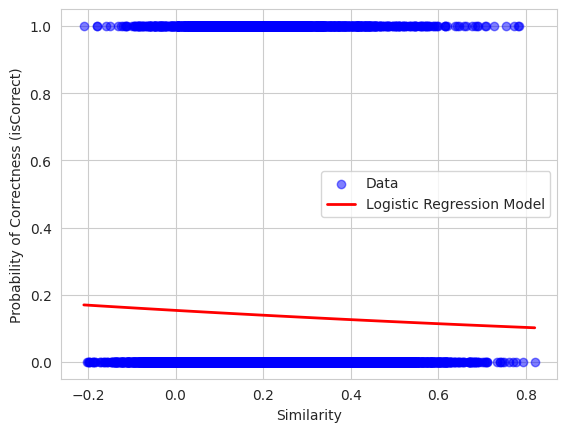

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of the original data
plt.scatter(df["similarity"], df["isCorrect"], label="Data", color="blue", alpha=0.5)

# Generate values for the logistic regression curve (model's prediction)
X_vals = np.linspace(df["similarity"].min(), df["similarity"].max(), 100)  # Generate X values for the curve
X_vals_with_const = sm.add_constant(X_vals)  # Add constant term (intercept) to X values

# Predict probabilities using the logistic regression model
y_vals = logit_model.predict(X_vals_with_const)

# Plot the logistic regression curve
plt.plot(X_vals, y_vals, color="red", label="Logistic Regression Model", linewidth=2)

# Add labels and legend
plt.xlabel("Similarity")
plt.ylabel("Probability of Correctness (isCorrect)")
plt.legend()

# Show plot
plt.show()
